<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_R/K_means_%EA%B3%A0%EA%B0%9D%EC%84%B8%EB%B6%84%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

비지도 학습 K-means clustering

Elbow Method, 
Silhouette Method

여기서는 Silhouette Method를 사용한다.

목표 : 고객의 연간 수입과 지출 점수를 기반으로 클러스터링

In [1]:
library(tidyverse)
library(cluster)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



데이터가 로드되고 mar라는 이름의 데이터 프레임으로 저장

데이터 세트에 5개의 변수가 있고, 결측값이 없으므로 계속 진행합니다.

In [9]:
mar <- read.csv("/content/Mall_Customers.csv")
head(mar)
# colSums(is.na(mar))

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


실루엣 방법을 사용하면 다른 군집과 비교하여 각 관측치가 할당된 군집 내에서의 유사성을 계산할 수 있습니다.

income과 spending , 두 가지 변수만 가진 mar1을 만듭니다.

k,sil_width
<int>,<dbl>
2,0.3960019
3,0.4649832
4,0.3544029
5,0.5535287


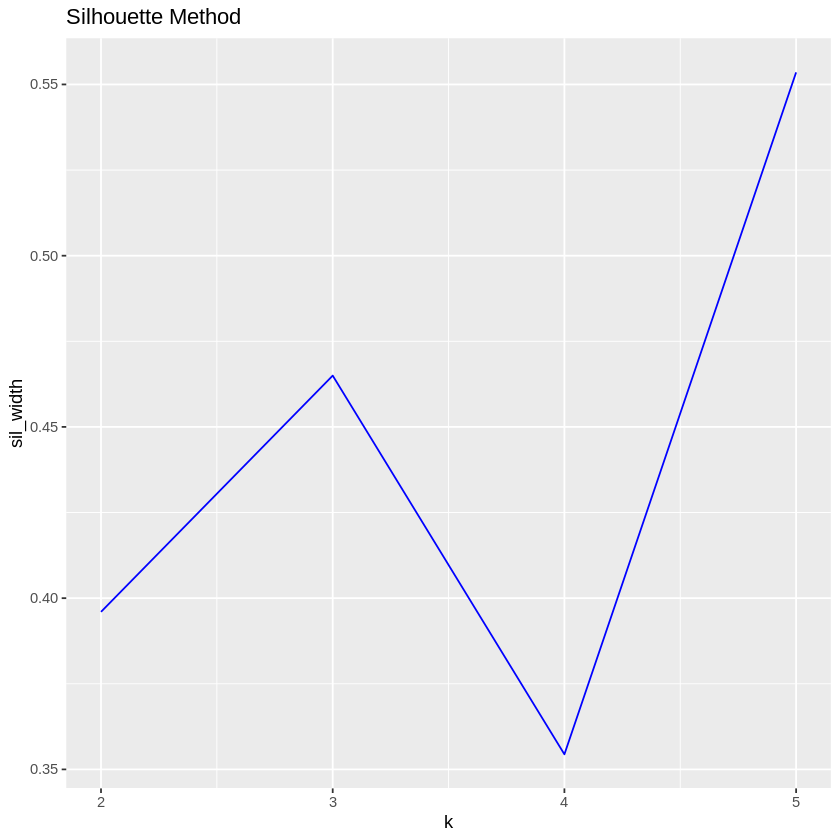

In [3]:
mar1 <- mar %>%
  select(-CustomerID,-Gender,-Age)
#silhouted annalysis for k ----
sil <- map_dbl(2:5,function(k){
  model <- pam(mar1 , k=k)
  model$silinfo$avg.width
})
sil_df <- data.frame(k=2:5,sil_width=sil)
sil_df
ggplot(sil_df, aes(x = k, y = sil_width)) +
  geom_line(col = "blue") +
  scale_x_continuous(breaks = 2:5)+ ggtitle("Silhouette Method")

K=5일때 sil_with가 1에 가장 가깝다는 것을 알 수 있다. 

In [4]:
set.seed(21)
clus <- kmeans(mar1,5)
clus

K-means clustering with 5 clusters of sizes 81, 35, 23, 22, 39

Cluster means:
  Annual.Income..k.. Spending.Score..1.100.
1           55.29630               49.51852
2           88.20000               17.11429
3           26.30435               20.91304
4           25.72727               79.36364
5           86.53846               82.12821

Clustering vector:
  [1] 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 [38] 4 3 4 3 4 3 1 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 5 2 5 1 5 2 5 2 5 1 5 2 5 2 5 2 5 2 5 1 5 2 5 2 5
[149] 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2
[186] 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5

Within cluster sum of squares by cluster:
[1]  9875.111 12511.143  5098.696  3519.455 13444.051
 (between_SS / total_SS =  83.5 %)

Available components:

[1] "cluster"      "centers"      "totss"    

In [5]:
mar <- mutate(mar,cluster = clus$cluster)
head(mar)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.,cluster
,<int>,<chr>,<int>,<int>,<int>,<int>
1,1,Male,19,15,39,3
2,2,Male,21,15,81,4
3,3,Female,20,16,6,3
4,4,Female,23,16,77,4
5,5,Female,31,17,40,3
6,6,Female,22,17,76,4


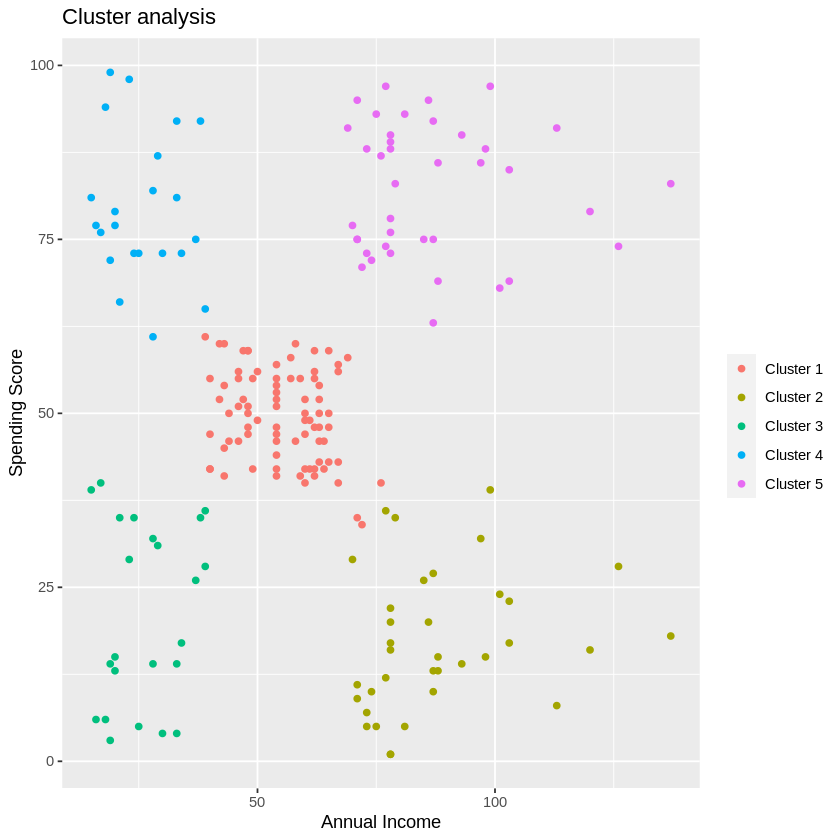

In [6]:
ggplot(mar,aes(Annual.Income..k..,Spending.Score..1.100., col=factor(cluster)))+geom_point()+ xlab("Annual Income")+
  ylab("Spending Score")+ggtitle("Cluster analysis")+ scale_color_discrete(name=" ",
                         breaks=c("1", "2", "3", "4", "5"),
                         labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"))

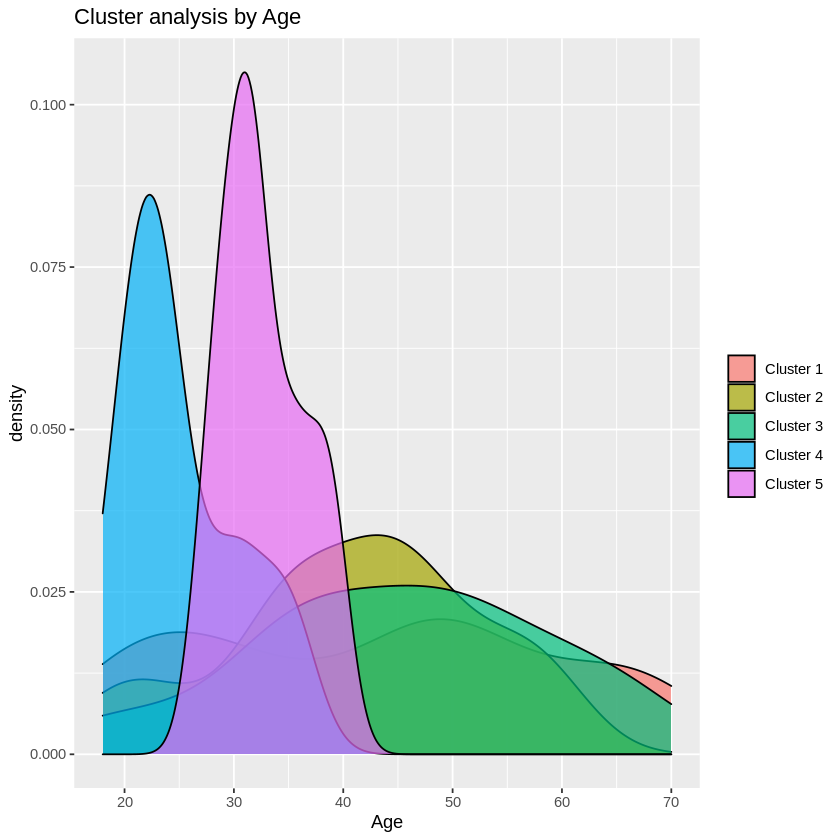

In [7]:
ggplot(mar,aes(Age,fill= factor(cluster)))+geom_density(alpha=0.7)+ggtitle("Cluster analysis by Age")+ scale_fill_discrete(name=" ",
                         breaks=c("1", "2", "3", "4", "5"),
                         labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"))

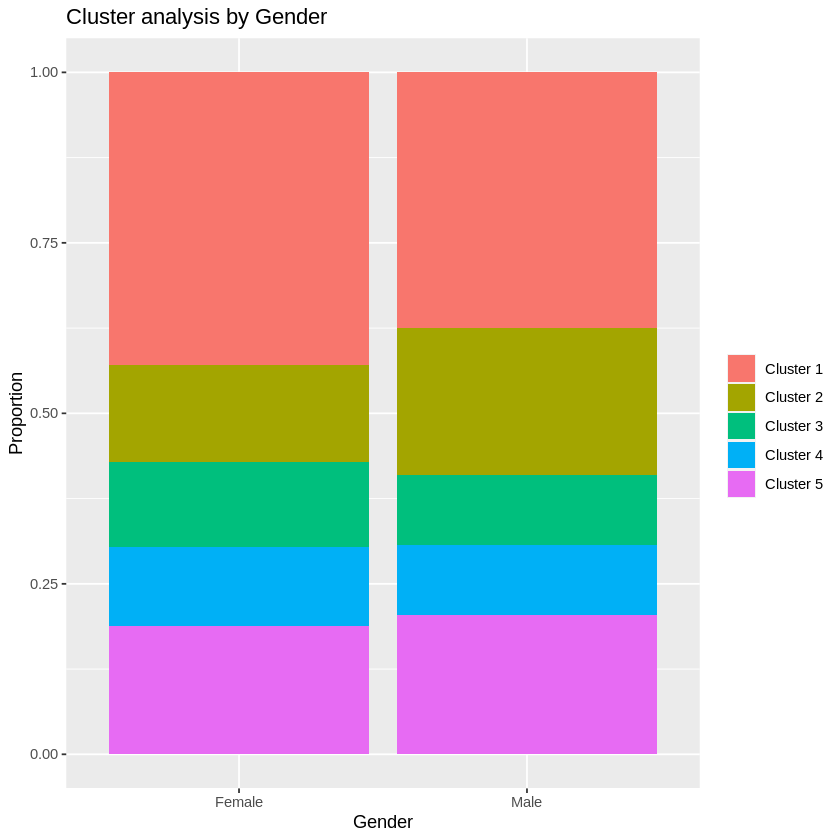

In [8]:
ggplot(mar,aes(Gender,fill= factor(cluster)))+geom_bar(position = "fill")+ggtitle("Cluster analysis by Gender")+ scale_fill_discrete(name=" ",
                         breaks=c("1", "2", "3", "4", "5"),
                         labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5")) + ylab("Proportion")